# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dfNew = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HorseDetails.csv")

In [4]:
dfNew.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
dfNew.shape

(299, 28)

In [6]:
len(dfNew.columns)

28

In [7]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

# Preprocessing the Dataset

In [8]:
dfNew.loc[dfNew['lesion_1'] > 0, 'lesion_1'] = 1
dfNew.loc[dfNew['lesion_2'] > 0, 'lesion_2'] = 1
dfNew.loc[dfNew['lesion_3'] > 0, 'lesion_3'] = 1

dfNew['num_lesions'] = dfNew['lesion_1'] + dfNew['lesion_2'] + dfNew['lesion_3']
dfNew = dfNew.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1)
dfNew['num_lesions'].value_counts()

1    236
0     56
2      6
3      1
Name: num_lesions, dtype: int64

In [9]:
dfNew['surgery'].replace({'yes':1,'no':2}, inplace=True)
dfNew['age'].replace({'adult':1,'young':2}, inplace=True)
dfNew['temp_of_extremities'].replace({'normal':1,'warm':2,'cool':3,'cold':4}, inplace=True)
dfNew['peripheral_pulse'].replace({'increased':2,'normal':1,'reduced':3,'absent':4}, inplace=True)
dfNew['mucous_membrane'].replace({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1}, inplace=True)
dfNew['capillary_refill_time'].replace({'more_3_sec':3, '3':2, 'less_3_sec':1}, inplace=True)
dfNew['pain'].replace({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1}, inplace=True)
dfNew['peristalsis'].replace({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1}, inplace=True)
dfNew['abdominal_distention'].replace({'severe':4,'moderate':3,'slight':2,'none':1}, inplace=True)
dfNew['nasogastric_tube'].replace({'significant':3, 'slight':2, 'none':1}, inplace=True)
dfNew['nasogastric_reflux'].replace({'more_1_liter':3, 'less_1_liter':2, 'none':0}, inplace=True)
dfNew['rectal_exam_feces'].replace({'absent':4, 'decreased':3, 'increased':2, 'normal':1}, inplace=True)
dfNew['abdomen'].replace({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1}, inplace=True)
dfNew['abdomo_appearance'].replace({'serosanguious':3, 'cloudy':2, 'clear':1}, inplace=True)
dfNew['outcome'].replace({'euthanized':3, 'died':2, 'lived':1}, inplace=True)
dfNew['surgical_lesion'].replace({'yes':1,'no':0}, inplace=True)

In [10]:
# Dropping columns having significant number of NaN values
dfNew.drop(columns = ['cp_data', 'hospital_number'], axis = 1, inplace = True)

In [11]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    float64
 6   peripheral_pulse       230 non-null    float64
 7   mucous_membrane        252 non-null    float64
 8   capillary_refill_time  267 non-null    float64
 9   pain                   244 non-null    float64
 10  peristalsis            255 non-null    float64
 11  abdominal_distention   243 non-null    float64
 12  nasogastric_tube       195 non-null    float64
 13  nasogastric_reflux     193 non-null    float64
 14  nasogastric_reflux_ph  53 non-null     float64
 15  rectal

# Visualization of the Data to find Relation between input and output variables

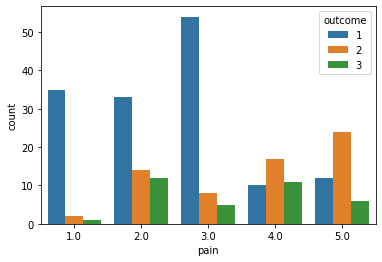

In [12]:
# Relation between outcome and degree of pain experienced by the horse
sns.countplot(data=dfNew, x='pain', hue = 'outcome')

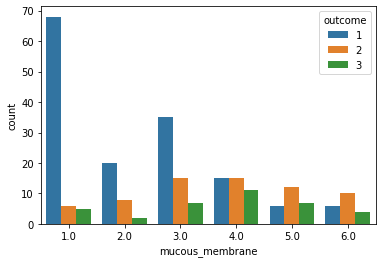

In [13]:
sns.countplot(data=dfNew, x='mucous_membrane', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

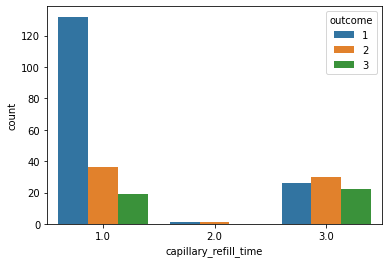

In [14]:
sns.countplot(data=dfNew, x='capillary_refill_time', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

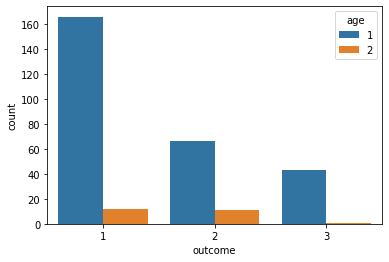

In [15]:
# Relation between outcome and degree of age of the horse
sns.countplot(data=dfNew, x='outcome', hue = 'age')

In [16]:
dfNew.isna().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
num_lesions                0
dtype: int64

# Filling Missing Values

In [17]:
for col in dfNew.columns:
  if dfNew[col].isna().sum() > 150: # More than 50% missing values
    print('Column ' + col + ' --> NULL VALUES: ' + str(dfNew[col].isna().sum()) + ' --> Correlation with target of ' + str(dfNew.corr()['outcome'][col]))

Column nasogastric_reflux_ph --> NULL VALUES: 246 --> Correlation with target of -0.08201647278598738
Column abdomo_appearance --> NULL VALUES: 165 --> Correlation with target of 0.3116557976470585
Column abdomo_protein --> NULL VALUES: 198 --> Correlation with target of -0.041550771048677076


In [18]:
dfNew = dfNew.drop(columns = ['abdomo_protein', 'nasogastric_reflux_ph', 'abdomo_appearance'], axis = 1)

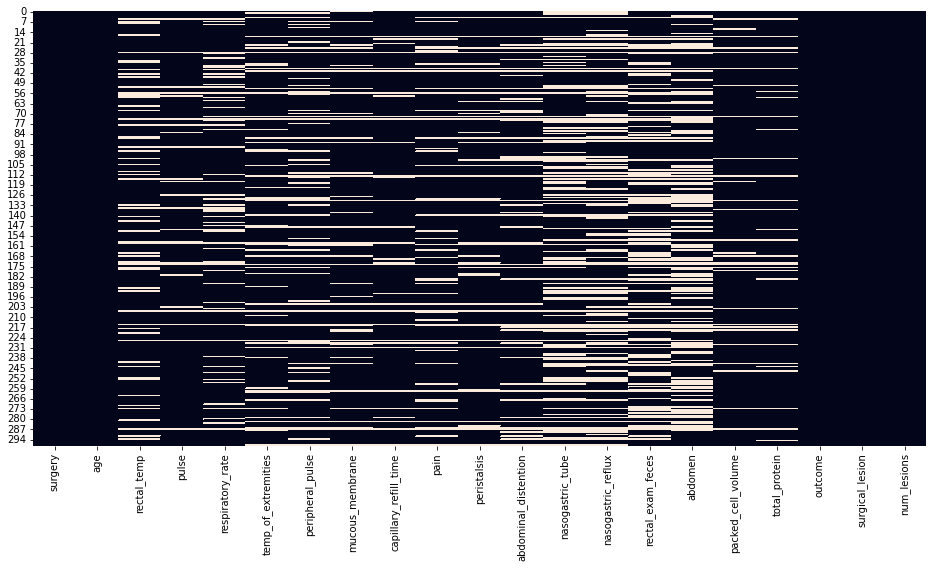

In [19]:
# Heatmap for missing values
plt.figure(figsize=(16,8))
sns.heatmap(dfNew.isnull(), cbar=False)

<function matplotlib.pyplot.show(*args, **kw)>

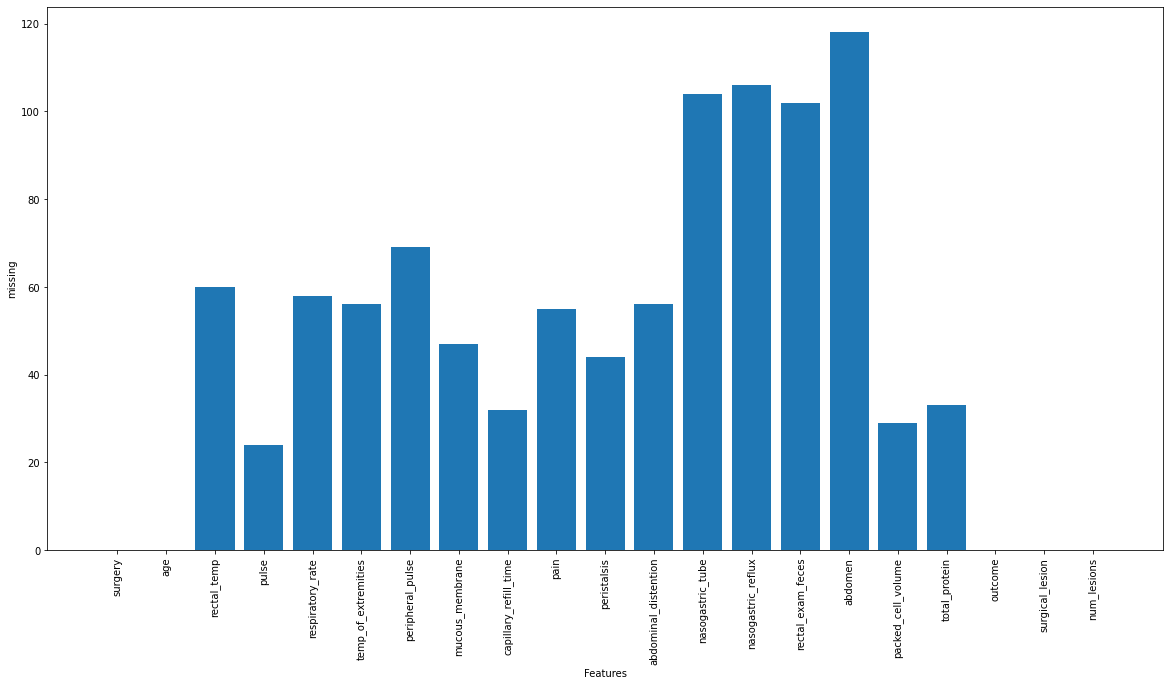

In [20]:
# BarGraph of missing values for clearer visualisation
null = dfNew.isnull().sum()

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(dfNew.columns))), list(dfNew.columns.values), rotation='vertical')
plt.show

In [21]:
# Columns containing NaN values
null = pd.concat([dfNew.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA > 0)]

,NA
rectal_temp,60
pulse,24
respiratory_rate,58
temp_of_extremities,56
peripheral_pulse,69
mucous_membrane,47
capillary_refill_time,32
pain,55
peristalsis,44
abdominal_distention,56


In [22]:
# Filtering columns having continous variables 
for col in dfNew.columns.values:
    if (len(dfNew[col].value_counts())> 5) and (dfNew[col].isnull().sum() > 0):
        print(col)

rectal_temp
pulse
respiratory_rate
mucous_membrane
packed_cell_volume
total_protein


In [23]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    float64
 6   peripheral_pulse       230 non-null    float64
 7   mucous_membrane        252 non-null    float64
 8   capillary_refill_time  267 non-null    float64
 9   pain                   244 non-null    float64
 10  peristalsis            255 non-null    float64
 11  abdominal_distention   243 non-null    float64
 12  nasogastric_tube       195 non-null    float64
 13  nasogastric_reflux     193 non-null    float64
 14  rectal_exam_feces      197 non-null    float64
 15  abdome

In [24]:
categorical_features = ['surgery' , 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 
       'rectal_exam_feces', 'abdomen']
       
numerical_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']

In [25]:
dfNew.dtypes

surgery                    int64
age                        int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities      float64
peripheral_pulse         float64
mucous_membrane          float64
capillary_refill_time    float64
pain                     float64
peristalsis              float64
abdominal_distention     float64
nasogastric_tube         float64
nasogastric_reflux       float64
rectal_exam_feces        float64
abdomen                  float64
packed_cell_volume       float64
total_protein            float64
outcome                    int64
surgical_lesion            int64
num_lesions                int64
dtype: object

In [26]:
# from sklearn.impute import SimpleImputer
# SimplImptr = SimpleImputer(strategy="mean")
# dfNew = pd.DataFrame(SimplImptr.fit_transform(dfNew), columns = dfNew.columns)

from sklearn.impute import KNNImputer
KnnImptr = KNNImputer(n_neighbors=3)
dfNew = pd.DataFrame(KnnImptr.fit_transform(dfNew), columns = dfNew.columns)

In [27]:
# # Filling columns containing continous variables with MEAN
# dfNew['surgery'].fillna(dfNew['surgery'].mode()[0], inplace = True)
# dfNew['rectal_temp'].fillna(dfNew['rectal_temp'].mean(), inplace = True)
# dfNew['pulse'].fillna(dfNew['pulse'].mean(), inplace = True)
# dfNew['respiratory_rate'].fillna(dfNew['pulse'].mean(), inplace = True)
# dfNew['mucous_membrane'].fillna(dfNew['pulse'].mean(), inplace = True)
# dfNew['packed_cell_volume'].fillna(dfNew['pulse'].mean(), inplace = True)
# dfNew['total_protein'].fillna(dfNew['total_protein'].mean(), inplace = True)

# # Filling columns containing categorical variables with MODE
# for col in dfNew.columns.values:
#     if (dfNew[col].isnull().sum()>0):  
#         if (dfNew[col].dtype == 'float64' or 'int64'):
#             dfNew[col].fillna(dfNew[col].mode()[0], inplace = True)

In [28]:
# null = pd.concat([dfNew.isnull().sum()], axis = 1, keys = ['NA'])
# null.loc[(null['NA'] > 0)]   

Detecting the correlation between the features and outcome

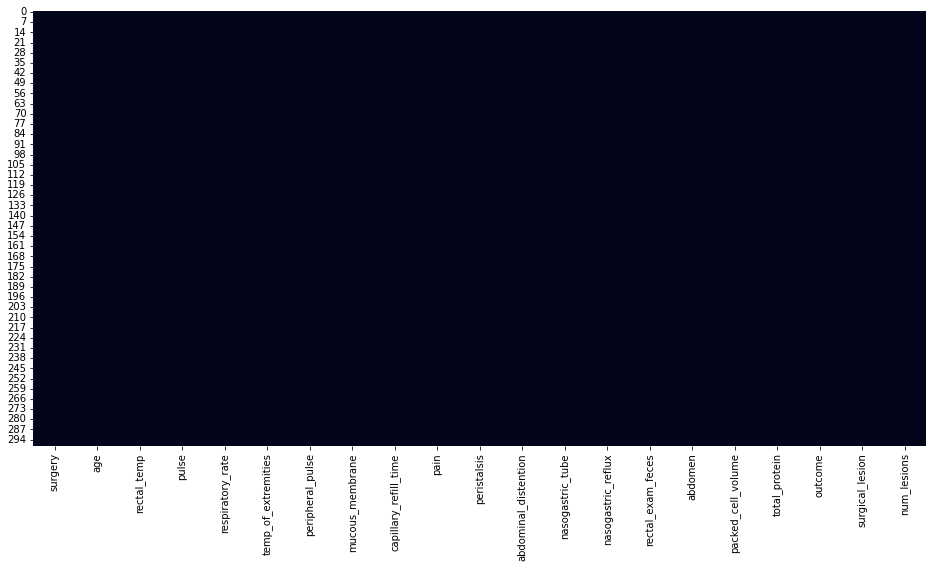

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(dfNew.isnull(), cbar=False)

In [30]:
dfNew.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
num_lesions              0
dtype: int64

In [31]:
dfTrain,dfTest = train_test_split(dfNew, test_size=0.2, random_state=0)

In [32]:
y_train = dfTrain['outcome']
x_train = dfTrain.drop(columns = ['outcome'], axis = 1) 
x_test = dfTest
y_test = dfTest['outcome']
dfTest.drop(columns = ['outcome'], axis = 1, inplace = True)


In [33]:
# Finding correlation between features and target variables
corr= dfNew.corr()

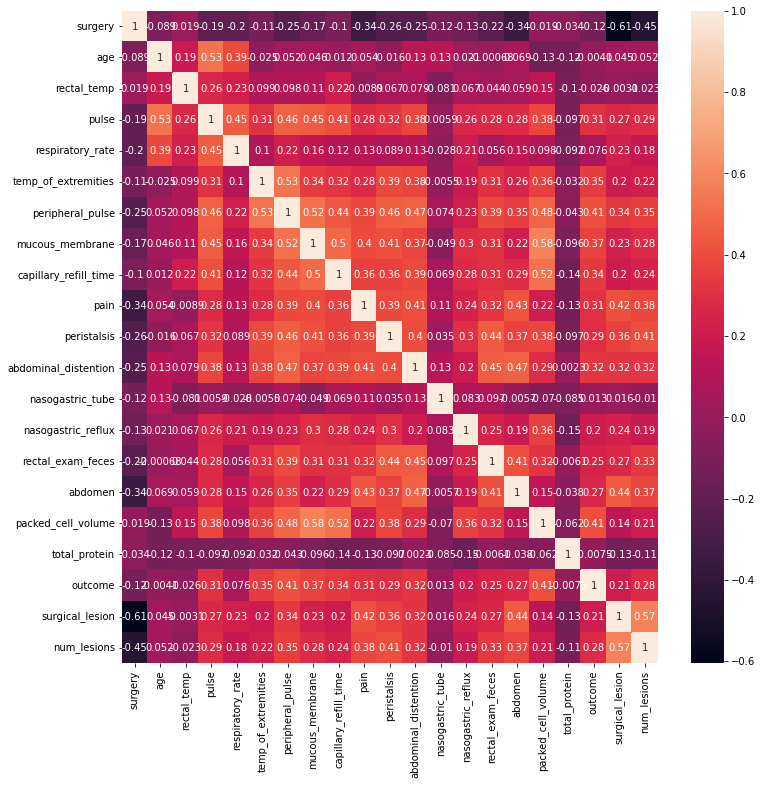

In [34]:
# # Heatmap of correlations
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)

# Predicting the Outcome 

In [35]:
lr = LogisticRegression(solver='liblinear', max_iter=400)

In [49]:
lr.fit(x_train, y_train)
print("Accuracy Score: ", lr.score(x_test, y_test))

Accuracy Score:  0.6333333333333333


In [ ]:
y_test = list(y_test)
y_test

In [ ]:
dfExpected = pd.DataFrame(y_test, columns=['Expected'])
dfExpected

# Comparing Expected and Predicted Values

In [47]:
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))
dfPredicted = pd.DataFrame(y_pred, columns=['Predicted'])
dfOutput = pd.concat([dfExpected, dfPredicted], axis=1)
dfOutput

0.6333333333333333


,Expected,Predicted
0,2.0,2.0
1,1.0,1.0
2,1.0,1.0
3,3.0,2.0
4,3.0,2.0
5,1.0,1.0
6,1.0,3.0
7,1.0,3.0
8,1.0,1.0
9,3.0,3.0


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[26,  1,  4],
       [ 7,  9,  0],
       [ 5,  5,  3]])